## Preprocessing of Data
The data is preprocessed, in NLP it is also known as text normalization. Some of the most common methods of text normalization are
- Tokenization
- Lemmatization
- Stemming
- Removal of Stopwords

In [1]:
# Importing required libraries
import numpy as np 
import pandas as pd 
import nltk
import string as s
import re
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS

import warnings
warnings.filterwarnings('ignore')

In [2]:
train_data=pd.read_csv("Data/train.csv",header=0,names=['classid','title','description'])
test_data=pd.read_csv("Data/test.csv",header=0,names=['classid','title','description'])

## Splitting data into Input and Label

In [3]:
x_train = train_data.description[:30000]
x_test = test_data.description

y_train = train_data.classid[:30000]
y_test = test_data.classid

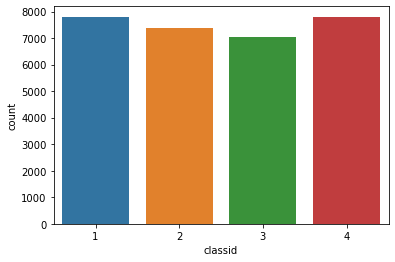

In [4]:
sns.countplot(y_train);

#### Removal of URLs

In [5]:
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

x_train = x_train.apply(remove_urls)
x_test = x_test.apply(remove_urls)

#### Removal of HTML tags

In [6]:
def remove_html(text):
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', text)

x_train = x_train.apply(remove_html)
x_test = x_test.apply(remove_html)

#### Tokenization of Data

In [7]:
def word_tokenize(text):
    tokens = re.findall("[\w']+", text)
    return tokens

x_train = x_train.apply(word_tokenize)
x_test = x_test.apply(word_tokenize)

#### Conversion of Data to Lowercase

In [8]:
def lowercasing(lst):
    new_lst=[]
    for  i in  lst:
        i=i.lower()
        new_lst.append(i) 
    return new_lst

x_train = x_train.apply(lowercasing)
x_test = x_test.apply(lowercasing)

#### Removal of Stopwords

In [9]:
def remove_stopwords(lst):
    stop=stopwords.words('english')
    new_lst=[]
    for i in lst:
        if i not in stop:
            new_lst.append(i)
    return new_lst

x_train = x_train.apply(remove_stopwords)
x_test = x_test.apply(remove_stopwords)  

#### Removal of Punctuation Symbols

In [10]:
def remove_punctuations(lst):
    new_lst=[]
    for i in lst:
        for  j in  s.punctuation:
            i=i.replace(j,'')
        new_lst.append(i)
    return new_lst
x_train = x_train.apply(remove_punctuations) 
x_test = x_test.apply(remove_punctuations)

#### Removal of Numbers(digits)

In [11]:
def remove_numbers(lst):
    nodig_lst=[]
    new_lst=[]

    for i in  lst:
        for j in  s.digits:
            i=i.replace(j,'')
        nodig_lst.append(i)
    for i in  nodig_lst:
        if  i!='':
            new_lst.append(i)
    return new_lst
x_train = x_train.apply(remove_numbers)
x_test = x_test.apply(remove_numbers)

#### Stemming of Data

In [12]:
def stemming(text):
    porter_stemmer = nltk.PorterStemmer()
    roots = [porter_stemmer.stem(each) for each in text]
    return (roots)

x_train = x_train.apply(stemming)
x_test = x_test.apply(stemming)

#### Lemmatization of Data

In [13]:
lemmatizer=nltk.stem.WordNetLemmatizer()
def lemmatzation(lst):
    new_lst=[]
    for i in lst:
        i=lemmatizer.lemmatize(i)
        new_lst.append(i)
    return new_lst
x_train = x_train.apply(lemmatzation)
x_test = x_test.apply(lemmatzation)

In [14]:
x_train = x_train.apply(lambda x: ''.join(i+' ' for i in x))
x_test = x_test.apply(lambda x: ''.join(i+' '  for i in x))

In [15]:
x_train.head()

0    reuter short seller wall street dwindl band ul...
1    reuter privat invest firm carlyl group reput m...
2    reuter soar crude price plu worri economi outl...
3    reuter author halt oil export flow main pipeli...
4    afp tearaway world oil price toppl record stra...
Name: description, dtype: object

### Save the Pre-processed Data

In [17]:
x_train.to_csv('Preprocessed_Data/x_train.csv', index=False)
x_test.to_csv('Preprocessed_Data/x_test.csv', index=False)

In [18]:
y_train.to_csv('Preprocessed_Data/y_train.csv', index=False)
y_test.to_csv('Preprocessed_Data/y_test.csv', index=False)

In [24]:
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

In [25]:
tfidf=TfidfVectorizer(min_df=3)
train_1=tfidf.fit_transform(x_train)
test_1=tfidf.transform(x_test)
print("No. of features extracted")
print(len(tfidf.get_feature_names()))

train_arr=train_1.toarray()
test_arr=test_1.toarray()

No. of features extracted
11335


In [33]:
# Save the fitted vectorizer to disk
vectorizer_filename = 'vectorizer.joblib'
joblib.dump(tfidf, vectorizer_filename)

['vectorizer.joblib']

In [26]:
# Training of Model
# Model 1- Multinomial Naive Bayes

NB_MN= MultinomialNB(alpha=0.16)
NB_MN.fit(train_arr,y_train)
pred=NB_MN.predict(test_arr)

print("first 20 actual labels")
print(y_test.tolist()[:20])
print("first 20 predicted labels")
print(pred.tolist()[:20])

first 20 actual labels
[3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
first 20 predicted labels
[3, 4, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3]


In [27]:
# Evaluation of Results
# Function for evaluation of model

# This function finds the F1-score and Accuracy of the trained model

def eval_model(y,y_pred):
    print("F1 score of the model")
    print(f1_score(y,y_pred,average='micro'))
    print("Accuracy of the model")
    print(accuracy_score(y,y_pred))
    print("Accuracy of the model in percentage")
    print(round(accuracy_score(y,y_pred)*100,3),"%")

In [28]:
# Function for Displaying the Confusion Matrix

# This function displays the confusion matrix of the model

def confusion_mat(color):
    cof=confusion_matrix(y_test, pred)
    cof=pd.DataFrame(cof, index=[i for i in range(1,5)], columns=[i for i in range(1,5)])
    sns.set(font_scale=1.5)
    plt.figure(figsize=(8,8));

    sns.heatmap(cof, cmap=color,linewidths=1, annot=True,square=True, fmt='d', cbar=False,xticklabels=['World','Sports','Business','Science'],yticklabels=['World','Sports','Business','Science']);
    plt.xlabel("Predicted Classes");
    plt.ylabel("Actual Classes");

In [29]:
eval_model(y_test,pred)
    
a=round(accuracy_score(y_test,pred)*100,3)

F1 score of the model


NameError: name 'f1_score' is not defined

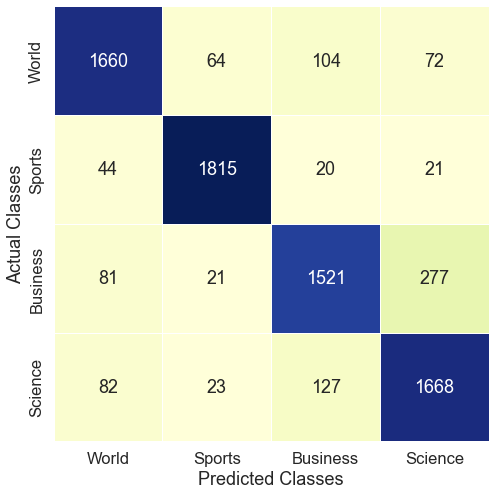

In [88]:
confusion_mat('YlGnBu')

In [90]:
# Model 2 - Decision Tree Classifier
DT=DecisionTreeClassifier()
DT.fit(train_arr,y_train)
pred=DT.predict(test_arr)

print("first 20 actual labels")
print(y_test.tolist()[:20])
print("first 20 predicted labels")
print(pred.tolist()[:20])

first 20 actual labels
[3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
first 20 predicted labels
[3, 4, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 3]


In [93]:
# Evaluation of Results
eval_model(y_test,pred)
b=round(accuracy_score(y_test,pred)*100,3)

F1 score of the model
0.7511842105263159
Accuracy of the model
0.7511842105263158
Accuracy of the model in percentage
75.118 %


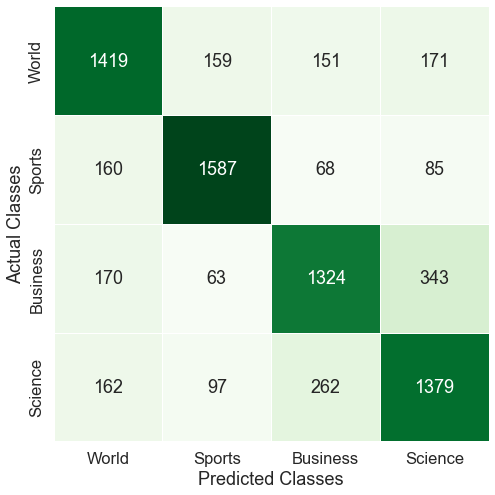

In [94]:
confusion_mat('Greens')

In [102]:
# Model 3 - Gaussian Naive Bayes
NB=GaussianNB(var_smoothing=0.1)
NB.fit(train_arr,y_train)
pred=NB.predict(test_arr)

In [103]:
# Evaluation of Results
eval_model(y_test,pred)
    
c=round(accuracy_score(y_test,pred)*100,3)

F1 score of the model
0.8663157894736843
Accuracy of the model
0.8663157894736843
Accuracy of the model in percentage
86.632 %


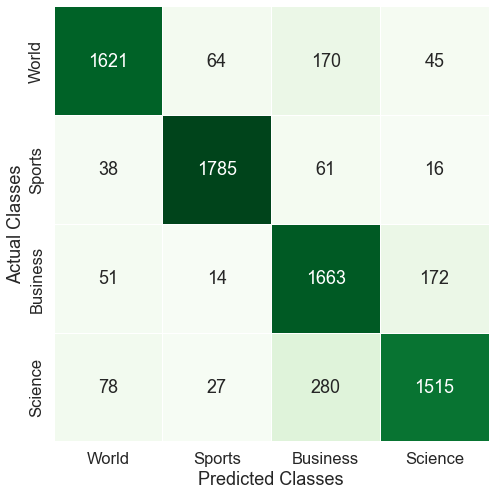

In [104]:
confusion_mat('Greens')

In [95]:
# Model 4 - Stochastic Gradient Descent Classifier
SGD=SGDClassifier(early_stopping=True,penalty='l2',alpha=0.00001)
SGD.fit(train_arr,y_train)
pred=SGD.predict(test_arr)


In [96]:
# Evaluation of Model
eval_model(y_test,pred)
    
d=round(accuracy_score(y_test,pred)*100,3)

F1 score of the model
0.8673684210526316
Accuracy of the model
0.8673684210526316
Accuracy of the model in percentage
86.737 %


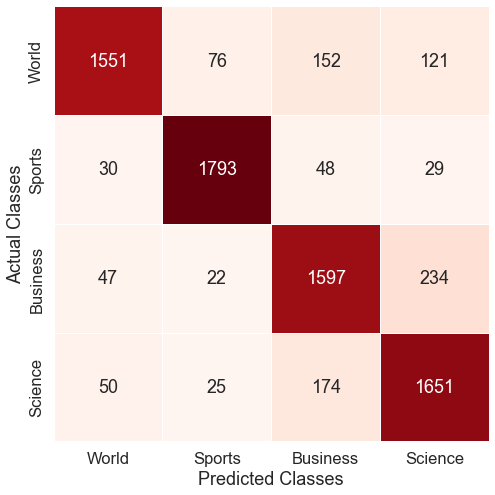

In [97]:
confusion_mat('Reds')

In [98]:
# Model 5 - Light Gradient Boosting Classifier
lgbm=LGBMClassifier(learning_rate=0.35)
lgbm.fit(train_arr,y_train)
pred=lgbm.predict(test_arr)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.443559 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 157731
[LightGBM] [Info] Number of data points in the train set: 30000, number of used features: 3822
[LightGBM] [Info] Start training from score -1.346561
[LightGBM] [Info] Start training from score -1.405137
[LightGBM] [Info] Start training from score -1.448737
[LightGBM] [Info] Start training from score -1.348357


In [99]:
# Evaluation of Model
eval_model(y_test,pred)

e=round(accuracy_score(y_test,pred)*100,3)

F1 score of the model
0.8673684210526316
Accuracy of the model
0.8673684210526316
Accuracy of the model in percentage
86.737 %


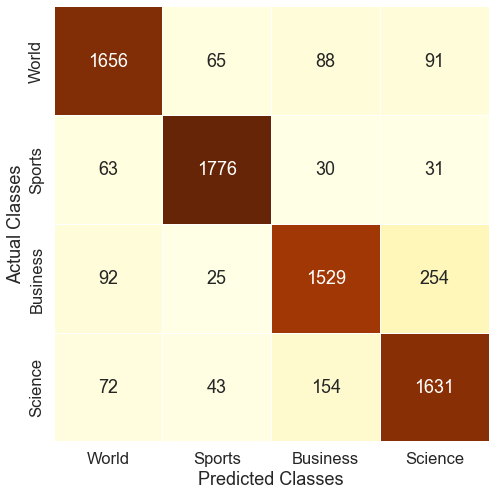

In [100]:
confusion_mat('YlOrBr')

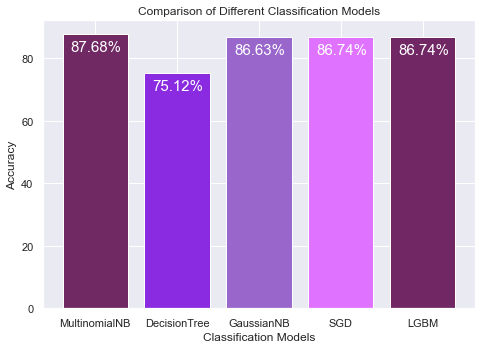

In [105]:
# Comparison of Accuracies of Different Models
sns.set()
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Models = ['MultinomialNB', 'DecisionTree', 'GaussianNB', 'SGD','LGBM']
Accuracy=[a,b,c,d,e]
ax.bar(Models,Accuracy,color=['#702963','#8a2be2','#9966cc','#df73ff','#702763']);
for i in ax.patches:
    ax.text(i.get_x()+.1, i.get_height()-5.5, str(round(i.get_height(),2))+'%', fontsize=15, color='white')
plt.title('Comparison of Different Classification Models');
plt.ylabel('Accuracy');
plt.xlabel('Classification Models');

plt.show();

#### Save Deployment

In [30]:
import joblib

# Assuming model is your trained Multinomial Naive Bayes model
joblib.dump(NB_MN, 'NB_model.joblib')

['NB_model.joblib']